In [1]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cosmic.evolve import Evolve
from cosmic.utils import convert_kstar_evol_type
from cosmic.plotting import evolve_and_plot

import tqdm

In [2]:
WD = [10, 11, 12]
MS = [0, 1]

In [3]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', 
                                                                                                 WD, 
                                                                                                 MS, 
                                                                                                 binfrac_model='vanHaaften', 
                                                                                                 primary_model='kroupa01', 
                                                                                                 ecc_model='uniform', 
                                                                                                 porb_model='moe19', 
                                                                                                 SF_start=13700.0, 
                                                                                                 SF_duration=0.0, 
                                                                                                 met=0.02, 
                                                                                                 size=10000)

/usr/local/Caskroom/miniconda/base/envs/cosmic/lib/python3.10/site-packages/cosmic/sample/sampler/independent.py:200: UserWarning: your supplied binfrac_model has been overwritten to 0.46 match Moe+2019
  warnings.warn('your supplied binfrac_model has been overwritten to {} match Moe+2019'.format(binfrac_model))


In [4]:
print(InitialBinaries)

       kstar_1  kstar_2     mass_1    mass_2          porb       ecc  \
0          1.0      1.0  10.492213  2.681321  4.713535e+04  0.918125   
1          1.0      1.0   4.576520  4.572990  3.091557e+05  0.792058   
2          0.0      0.0   0.530410  0.089836  4.589502e+04  0.432549   
3          1.0      0.0   0.982864  0.204197  1.390442e+03  0.943796   
4          1.0      1.0   1.579766  1.194724  4.346622e+02  0.895697   
...        ...      ...        ...       ...           ...       ...   
10974      1.0      1.0   1.413985  1.027905  1.865083e+06  0.001980   
10975      1.0      0.0   0.715631  0.118383  2.692975e+02  0.919202   
10976      1.0      0.0   0.823888  0.478857  5.701981e+04  0.595031   
10977      0.0      0.0   0.684152  0.605115  1.590947e+03  0.659784   
10978      1.0      0.0   0.931240  0.175436  3.104836e+06  0.322543   

       metallicity   tphysf    mass0_1   mass0_2  ...  tacc_1  tacc_2  \
0             0.02  13700.0  10.492213  2.681321  ...     0.0 

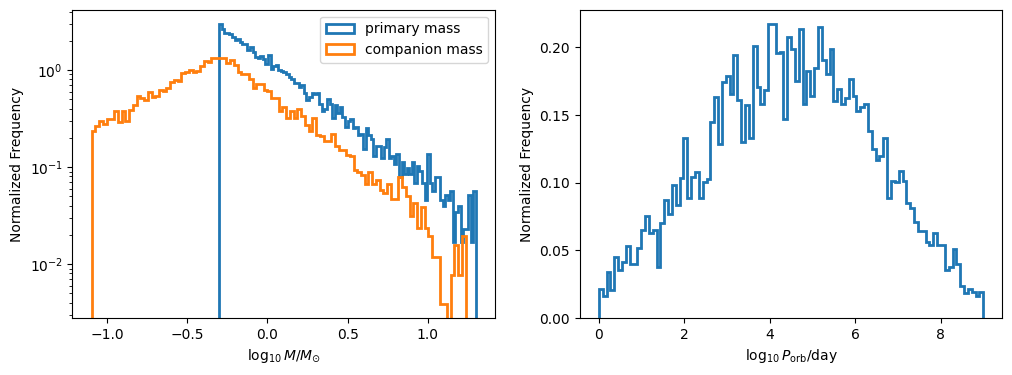

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(np.log10(InitialBinaries['mass_1']), bins=100, histtype='step', linewidth=2, label='primary mass', density=True)
axs[0].hist(np.log10(InitialBinaries['mass_2']), bins=100, histtype='step', linewidth=2, label='companion mass', density=True)
axs[0].set_yscale('log')

# Display the plot
axs[0].set_xlabel(r'$\log_{10} M/M_{\odot}$')
axs[0].set_ylabel('Normalized Frequency')
axs[0].legend()

axs[1].hist(np.log10(InitialBinaries['porb']), bins=100, histtype='step', linewidth=2, density=True)
axs[1].set_xlabel(r'$\log_{10} P_{\mathrm{orb}}$/day')
axs[1].set_ylabel('Normalized Frequency')

plt.savefig("sample-distribution", dpi=300)
plt.show()

In [6]:
print(f'mass_singles = {mass_singles}')
print(f'mass_binaries = {mass_binaries}')
print(f'n_singles = {n_singles}')
print(f'n_binaries = {n_binaries}')

mass_singles = 33862.11234854681
mass_binaries = 45665.85280860565
n_singles = 59240
n_binaries = 50760


In [7]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 
           'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 
           'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 
           'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 
           'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 
           'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 
           'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 
           'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 
           'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 
           'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 
           'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 
           'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 
           'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 
           'zsun' : 0.019, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 
           'wd_mass_lim' : 1}

In [8]:
BSEDictList = [BSEDict.copy() for i in range(5)]
BSEDictList[0]['lambdaf'] = -5
BSEDictList[1]['lambdaf'] = -15
BSEDictList[2]['lambdaf'] = -25
BSEDictList[3]['lambdaf'] = -35
BSEDictList[4]['lambdaf'] = -45

In [9]:
print(BSEDictList[0]['lambdaf'])
print(BSEDictList[1]['lambdaf'])
print(BSEDictList[2]['lambdaf'])
print(BSEDictList[3]['lambdaf'])
print(BSEDictList[4]['lambdaf'])

-5
-15
-25
-35
-45


In [10]:
bppList = [0 for i in range(5)]
bcmList = [0 for i in range(5)]
initCList = [0 for i in range(5)]

In [11]:
for i in tqdm.tqdm(range(5)):
    bppList[i], bcmList[i], initCList[i], kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDictList[i])

100%|████████████████████████████████████████████| 5/5 [11:06<00:00, 133.33s/it]


In [12]:
# Used to convert separation in R_sun into AU
unit_factor = 1 / 215.032
for i in range(5):
    bppList[i]['sep in AU'] = bppList[i]['sep'] * unit_factor
    bcmList[i]['sep in AU'] = bcmList[i]['sep'] * unit_factor

In [13]:
rowList = [0 for i in range(5)]
startList = [0 for i in range(5)]

for i in range(5):
    cond1 = (bppList[i]['evol_type'] == 8) # Select evol type to be common envelope ends
    cond2 = (bppList[i]['kstar_1'] <= 12) 
    cond3 = (bppList[i]['kstar_1'] >= 10) # Select kstar_1 to be WD
    cond4 = (bppList[i]['kstar_2'] <= 1)
    cond5 = (bppList[i]['kstar_2'] >= 0) # Select kstar_2 to be MS
    rowList[i] = bppList[i].loc[(cond1) & (cond2) & (cond3) & (cond4) & (cond5)].groupby('bin_num',as_index=False).first()

    # select kstar_1 at the start of roche lobe overflow
    startRL = (bppList[i]['evol_type'] == 3)
    startList[i] = bppList[i].loc[(startRL)].groupby('bin_num',as_index=False).first()
    startList[i] = startList[i].loc[startList[i]['bin_num'].isin(rowList[i]['bin_num'])]

In [14]:
print(rowList[0][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
print(rowList[1][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
print(startList[0][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])
print(startList[1][['tphys', 'mass_1', 'kstar_1', 'kstar_2', 'sep in AU', 'evol_type']])

            tphys    mass_1  kstar_1  kstar_2  sep in AU  evol_type
0    13319.444461  0.295572     10.0      0.0   0.025180        8.0
1     2520.334405  0.305695     10.0      1.0   0.046528        8.0
2     2366.261533  0.393680     10.0      0.0   0.095468        8.0
3      895.568374  0.633075     11.0      0.0   0.208511        8.0
4     7958.216213  0.396574     10.0      0.0   0.118833        8.0
..            ...       ...      ...      ...        ...        ...
885   5382.013702  0.362325     10.0      1.0   0.126326        8.0
886  12325.888069  0.472007     10.0      0.0   1.171156        8.0
887   1450.250523  0.540205     11.0      1.0   0.603817        8.0
888   1789.088318  0.430262     10.0      1.0   0.292741        8.0
889    106.190134  0.719284     11.0      1.0   0.030530        8.0

[890 rows x 6 columns]
             tphys    mass_1  kstar_1  kstar_2  sep in AU  evol_type
0     13319.444461  0.295572     10.0      0.0   0.062099        8.0
1      2520.334405  0.

In [15]:
# Make plot for lambdaf = -5 (i = 0)
DList = [dict() for i in range(5)]

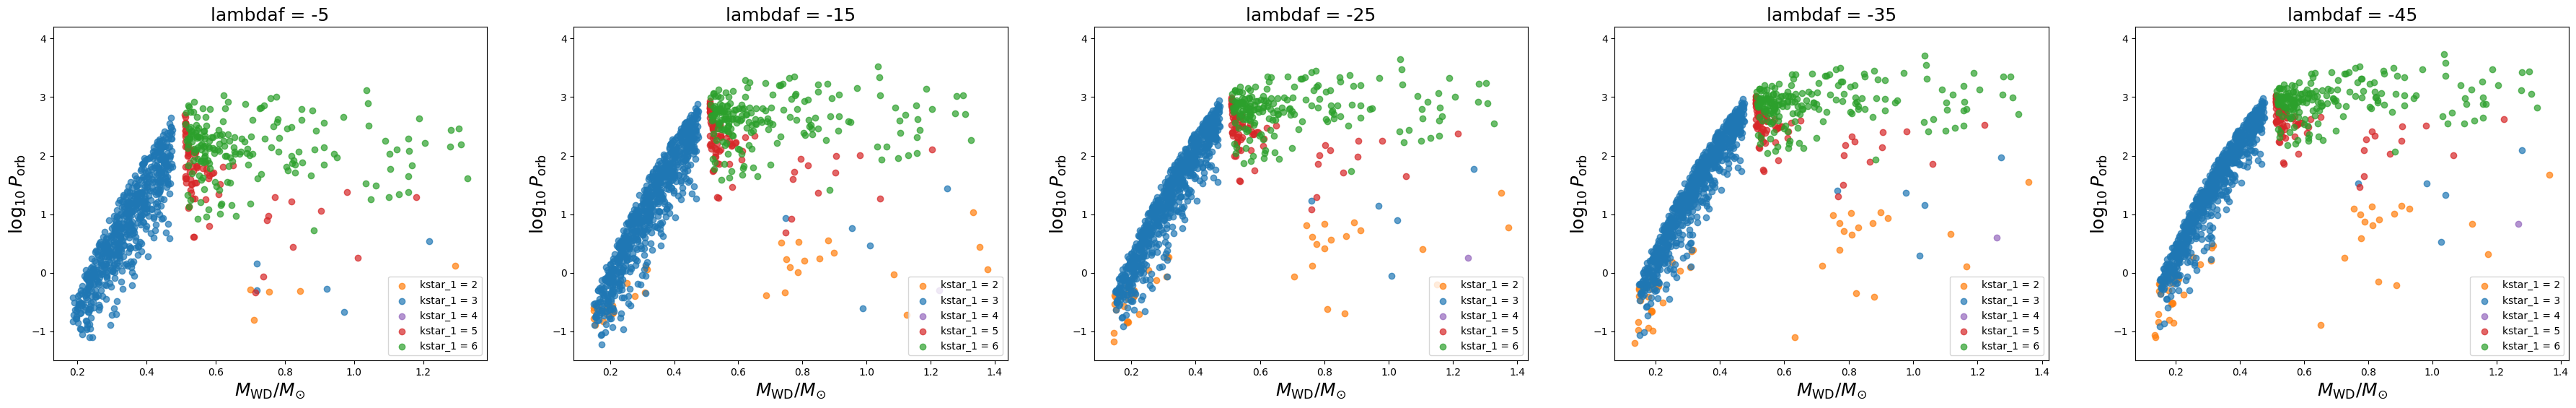

In [16]:
fig, axs = plt.subplots(1, 5, figsize=(45,6))
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']
for i in range(5):
    
    D = DList[i]
    for star in range(16):
        D[star] = startList[i].loc[(startList[i]['kstar_1'] == star)]['bin_num']
    
    for star in [2,3,4,5,6]:
        sublist = rowList[i].loc[rowList[i]['bin_num'].isin(D[star])]
        axs[i].scatter(sublist['mass_1'], np.log10(sublist['porb']), label = f'kstar_1 = {star}', c=color[star-2], alpha=0.7)
    axs[i].set_title(f'lambdaf = {-5 - 10*i}', fontsize=18)
    axs[i].set_xlabel(r'$M_{\mathrm{WD}} / M_{\odot}$', fontsize=18)
    axs[i].set_ylabel(r'$\log_{10} P_{\mathrm{orb}}$', fontsize=18)
    axs[i].set_ylim(-1.5, 4.2)
    axs[i].legend(loc='lower right')
plt.savefig('kstar_map',dpi=300)
plt.show()

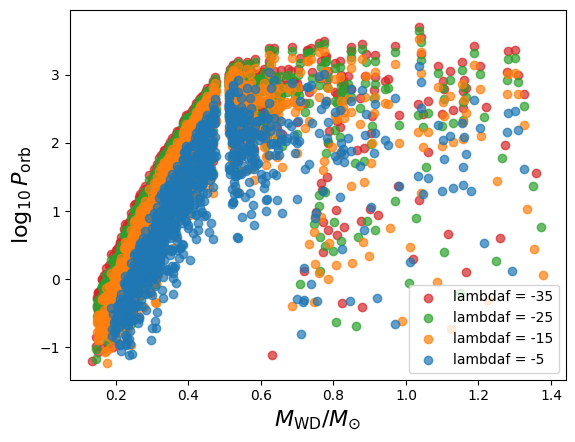

In [17]:
plt.scatter(rowList[3]['mass_1'], np.log10(rowList[3]['porb']), label=r'lambdaf = -35', color = 'tab:red', alpha = 0.7)
plt.scatter(rowList[2]['mass_1'], np.log10(rowList[2]['porb']), label=r'lambdaf = -25', color = 'tab:green', alpha = 0.7)
plt.scatter(rowList[1]['mass_1'], np.log10(rowList[1]['porb']), label=r'lambdaf = -15', color = 'tab:orange', alpha = 0.7)
plt.scatter(rowList[0]['mass_1'], np.log10(rowList[0]['porb']), label=r'lambdaf = -5', color = 'tab:blue', alpha = 0.7)
plt.xlabel(r'$M_{\mathrm{WD}}/ M_{\odot}$', fontsize=16)
plt.ylabel(r'$\log_{10} P_{\mathrm{orb}}$', fontsize=16)
plt.legend()
plt.savefig('Mwd-P scatter', dpi=300)
plt.show()

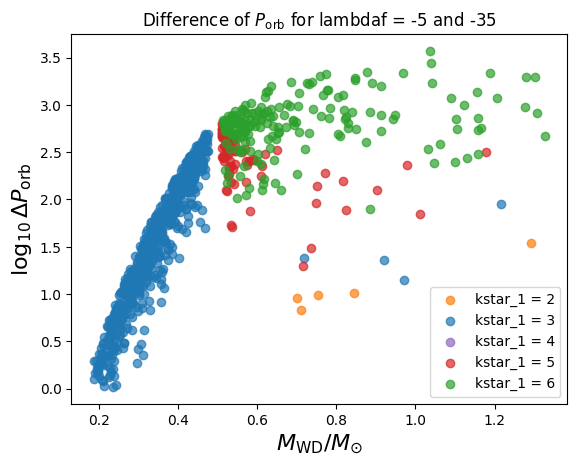

In [23]:
commonbinnums = np.intersect1d(rowList[0]['bin_num'], rowList[3]['bin_num'])
commonList3 = rowList[3].loc[rowList[3]['bin_num'].isin(commonbinnums)]
commonList0 = rowList[0].loc[rowList[0]['bin_num'].isin(commonbinnums)]
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']

for star in [2,3,4,5,6]:
    subList3 = commonList3.loc[commonList3['bin_num'].isin(DList[3][star])]
    subList0 = commonList0.loc[commonList0['bin_num'].isin(DList[0][star])]
    dif = subList3['porb'].values-subList0['porb'].values
    plt.scatter(subList0['mass_1'], np.log10(dif), c=color[star-2], label= f'kstar_1 = {star}', alpha=0.7)

plt.xlabel(r'$M_{\mathrm{WD}}/ M_{\odot}$', fontsize=16)
plt.ylabel(r'$\log_{10} \Delta P_{\mathrm{orb}}$', fontsize=16)
plt.title(r'Difference of $P_{\mathrm{orb}}$ for lambdaf = -5 and -35')
plt.legend()
plt.savefig("dif-kstar map", dpi=300)
plt.show()

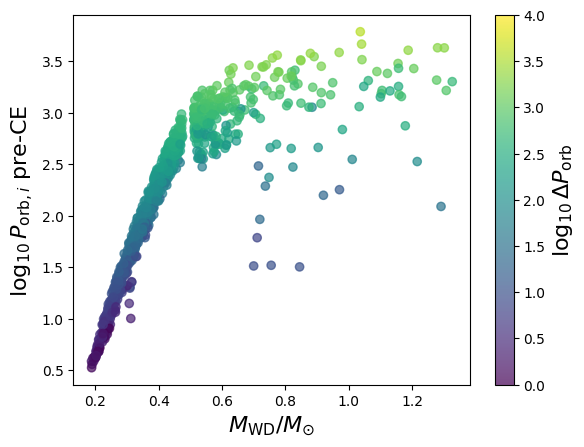

In [30]:
commonbinnums = np.intersect1d(rowList[0]['bin_num'], rowList[3]['bin_num'])
commonList3 = rowList[3].loc[rowList[3]['bin_num'].isin(commonbinnums)]
commonList0 = rowList[0].loc[rowList[0]['bin_num'].isin(commonbinnums)]
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']

for star in [2,3,4,5,6]:
    subList3 = commonList3.loc[commonList3['bin_num'].isin(DList[0][star])]
    subList0 = commonList0.loc[commonList0['bin_num'].isin(DList[0][star])]
    # start = startList[0].loc[startList[0]['bin_num'].isin(commonbinnums)]
    start = startList[0].loc[startList[0]['bin_num'].isin(subList0['bin_num'])]
    # print(len(start))
    # print(len(subList0))
    dif = np.log10(start['porb'])
    plt.scatter(subList0['mass_1'], dif, c=np.log10(subList3['porb'].values-subList0['porb']), label= f'kstar_1 = {star}', alpha=0.7,vmin=0, vmax=4)

plt.xlabel(r'$M_{\mathrm{WD}} / M_{\odot}$', fontsize=16)
plt.ylabel(r'$\log_{10} P_{\mathrm{orb}, i}$ pre-CE', fontsize=16)
# plt.title(r'Difference of $P_{\mathrm{orb}}$ for lambdaf = -5 and -35')
# plt.legend()
cb = plt.colorbar()
cb.set_label(label = r"$\log_{10} \Delta P_{\mathrm{orb}}$", size=16)
plt.savefig("dif-kstar explain", dpi=300)
plt.show()
# bigger change when pre-CE orbit period is bigger
# save this fig

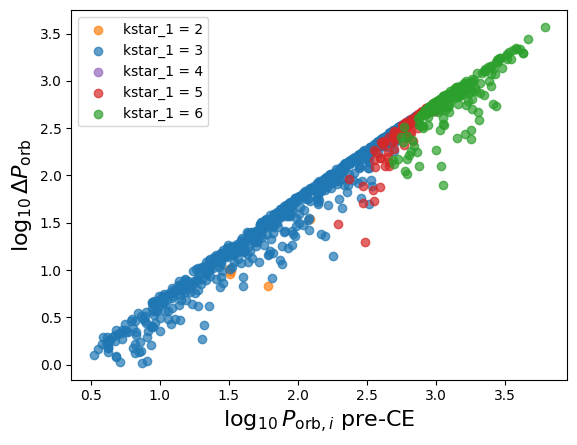

In [31]:
commonbinnums = np.intersect1d(rowList[0]['bin_num'], rowList[3]['bin_num'])
commonList3 = rowList[3].loc[rowList[3]['bin_num'].isin(commonbinnums)]
commonList0 = rowList[0].loc[rowList[0]['bin_num'].isin(commonbinnums)]
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']

for star in [2,3,4,5,6]:
    subList3 = commonList3.loc[commonList3['bin_num'].isin(DList[0][star])]
    subList0 = commonList0.loc[commonList0['bin_num'].isin(DList[0][star])]
    # start = startList[0].loc[startList[0]['bin_num'].isin(commonbinnums)]
    start = startList[0].loc[startList[0]['bin_num'].isin(subList0['bin_num'])]
    # print(len(start))
    # print(len(subList0))
    plt.scatter(np.log10(start['porb']), np.log10(subList3['porb'].values-subList0['porb']), c=color[star-2], label= f'kstar_1 = {star}', alpha=0.7)

plt.ylabel(r'$\log_{10} \Delta P_{\mathrm{orb}}$', fontsize=16)
plt.xlabel(r'$\log_{10} P_{\mathrm{orb}, i}$ pre-CE', fontsize=16)
plt.xlim()
# plt.title(r'Difference of $P_{\mathrm{orb}}$ for lambdaf = -5 and -35')
plt.legend()
# cb = plt.colorbar()
cb.set_label(label = r"$\log_{10} \Delta P_{\mathrm{orb}}$", size=16)
plt.savefig("dif-kstar explain alt", dpi=300)
plt.show()
# bigger change when pre-CE orbit period is bigger
# save this fig

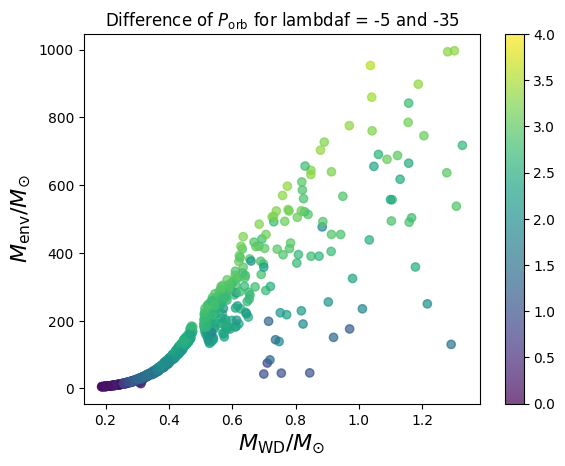

In [20]:
commonbinnums = np.intersect1d(rowList[0]['bin_num'], rowList[3]['bin_num'])
commonList3 = rowList[3].loc[rowList[3]['bin_num'].isin(commonbinnums)]
commonList0 = rowList[0].loc[rowList[0]['bin_num'].isin(commonbinnums)]
color = ['tab:orange', 'tab:blue', 'tab:purple', 'tab:red', 'tab:green']

for star in [2,3,4,5,6]:
    subList3 = commonList3.loc[commonList3['bin_num'].isin(DList[0][star])]
    subList0 = commonList0.loc[commonList0['bin_num'].isin(DList[0][star])]
    # start = startList[0].loc[startList[0]['bin_num'].isin(commonbinnums)]
    start = startList[0].loc[startList[0]['bin_num'].isin(subList0['bin_num'])]
    # print(len(start))
    # print(len(subList0))
    dif = start['rad_1']
    plt.scatter(subList0['mass_1'], dif, c=np.log10(subList3['porb'].values-subList0['porb']), label= f'kstar_1 = {star}', alpha=0.7,vmin=0, vmax=4)

plt.xlabel(r'$M_{\mathrm{WD}} / M_{\odot}$', fontsize=16)
plt.ylabel(r'$M_{\mathrm{env}} / M_{\odot}$', fontsize=16)
plt.title(r'Difference of $P_{\mathrm{orb}}$ for lambdaf = -5 and -35')
# plt.legend()
plt.colorbar()
plt.savefig("dif-kstar map", dpi=300)
plt.show()

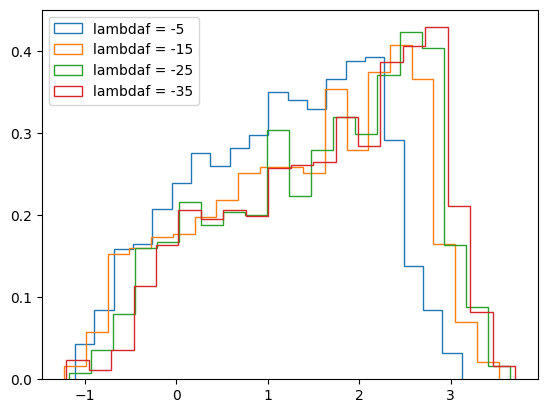

In [21]:
plt.hist(np.log10(rowList[0]['porb']), bins=20, histtype='step', label=r'lambdaf = -5', density=True)
plt.hist(np.log10(rowList[1]['porb']), bins=20, histtype='step', label=r'lambdaf = -15', density=True)
plt.hist(np.log10(rowList[2]['porb']), bins=20, histtype='step', label=r'lambdaf = -25', density=True)
plt.hist(np.log10(rowList[3]['porb']), bins=20, histtype='step', label=r'lambdaf = -35', density=True)
# plt.hist(np.log10(rowList[4]['porb']), bins=50, histtype='step', label=r'lambdaf = -45', density=True)
plt.legend()
plt.show()

/var/folders/vq/94799g2x01x81wrb29rc_lyr0000gp/T/ipykernel_50502/1714016698.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i][j].legend()


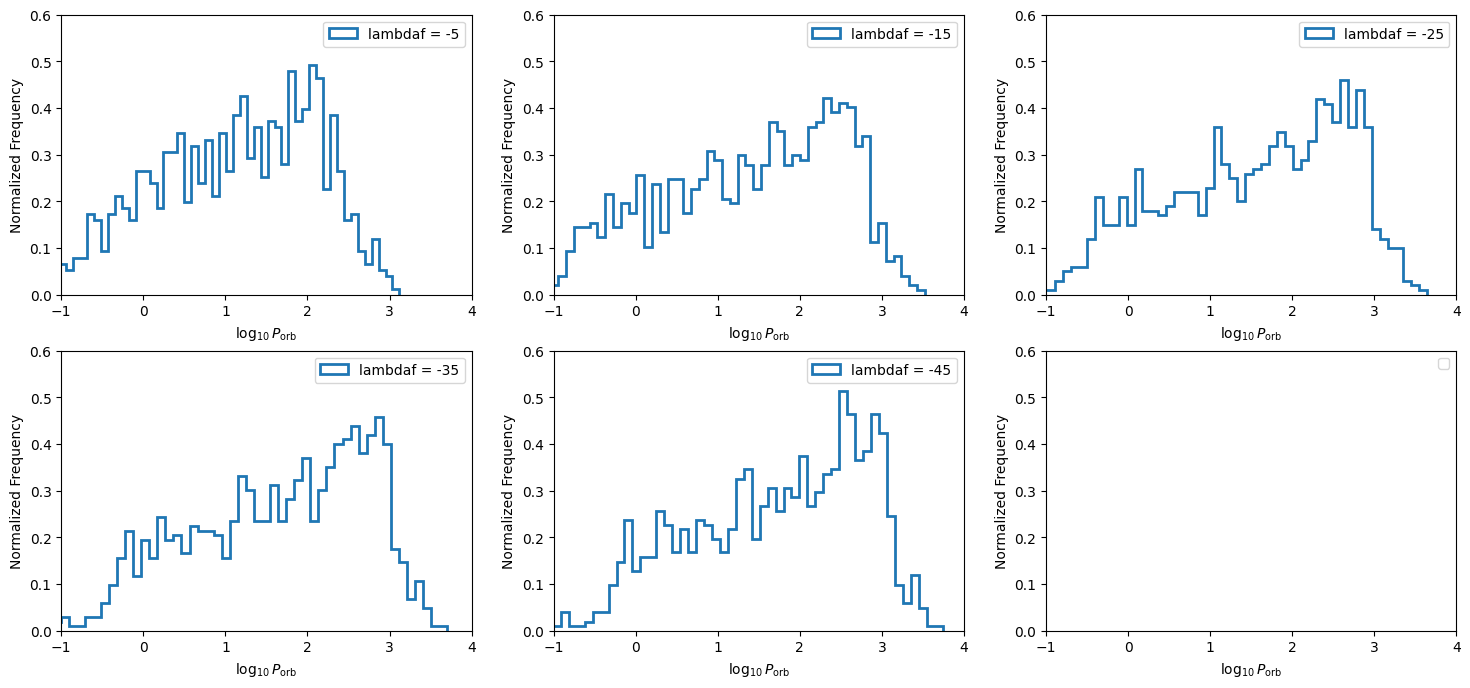

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(18,8))
axs[0][0].hist(np.log10(rowList[0]['porb']), bins=50, histtype='step', label=r'lambdaf = -5', linewidth = 2, density=True)
axs[0][1].hist(np.log10(rowList[1]['porb']), bins=50, histtype='step', label=r'lambdaf = -15', linewidth = 2, density=True)
axs[0][2].hist(np.log10(rowList[2]['porb']), bins=50, histtype='step', label=r'lambdaf = -25', linewidth = 2, density=True)
axs[1][0].hist(np.log10(rowList[3]['porb']), bins=50, histtype='step', label=r'lambdaf = -35', linewidth = 2, density=True)
axs[1][1].hist(np.log10(rowList[4]['porb']), bins=50, histtype='step', label=r'lambdaf = -45', linewidth = 2, density=True)

# Display the plot
for i in range(2):
    for j in range(3):
        axs[i][j].set_xlabel(r'$\log_{10} P_{\mathrm{orb}}$')
        axs[i][j].set_ylabel('Normalized Frequency')
        axs[i][j].set_xlim(-1, 4)
        axs[i][j].set_ylim(0, 0.6)
        axs[i][j].legend()
plt.show()